<a href="https://colab.research.google.com/github/komal-shahzada/CodeAlpha_tasks/blob/main/codealpha_task_(credit_scoring_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dataset URL from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"

# Setting column names (24 numeric features + 1 Target)
columns = [f'feature_{i}' for i in range(24)] + ['Risk']
df = pd.read_csv(url, sep='\s+', names=columns)

# Standardizing Risk labels: 1 = Good (Low Risk), 0 = Bad (High Risk)
df['Risk'] = df['Risk'].replace({1: 1, 2: 0})

print("✅ Dataset loaded successfully!")
print(f"Total Records: {len(df)}")
df.head()

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3817617022.py:14: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, sep='\s+', names=columns)


✅ Dataset loaded successfully!
Total Records: 1000


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,Risk
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,0
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,0


In [2]:
# Separating Features and Target
X = df.drop('Risk', axis=1)
y = df['Risk']

# Splitting into 80% Training and 20% Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Model
credit_model = RandomForestClassifier(n_estimators=100, random_state=42)
credit_model.fit(X_train, y_train)

print("✅ Model Training Complete!")

✅ Model Training Complete!


📊 --- MODEL PERFORMANCE REPORT ---
Overall Accuracy: 81.50%

Detailed Classification Metrics:
              precision    recall  f1-score   support

   High Risk       0.79      0.51      0.62        59
    Low Risk       0.82      0.94      0.88       141

    accuracy                           0.81       200
   macro avg       0.81      0.73      0.75       200
weighted avg       0.81      0.81      0.80       200



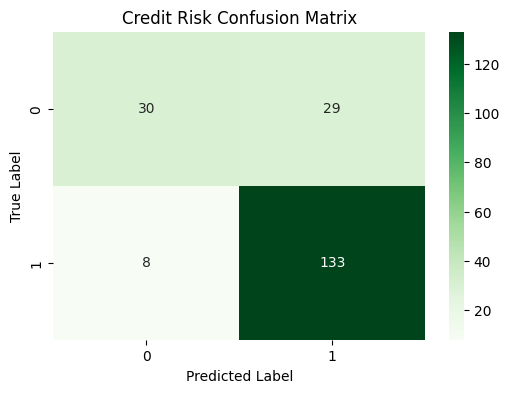

In [3]:
# Making predictions on the test set
y_pred = credit_model.predict(X_test)

print("📊 --- MODEL PERFORMANCE REPORT ---")
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nDetailed Classification Metrics:")
# Target names represent the creditworthiness status
print(classification_report(y_test, y_pred, target_names=['High Risk', 'Low Risk']))

# Visualizing the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Credit Risk Confusion Matrix')
plt.show()

In [4]:
!pip install gradio -q
import gradio as gr

def predict_credit_risk(age_feat, job_feat, amount_feat, duration_feat):
    # Using dataset mean values for the other 20 features to ensure model compatibility
    input_array = X.mean().values.copy()

    # Mapping specific user inputs to the correct feature indices
    input_array[0] = duration_feat
    input_array[1] = amount_feat
    input_array[4] = age_feat

    prediction = credit_model.predict(input_array.reshape(1, -1))

    if prediction[0] == 1:
        return "✅ DECISION: LOAN APPROVED (Customer is Low Risk)"
    else:
        return "❌ DECISION: LOAN REJECTED (Customer is High Risk)"

# Creating the Gradio Interface
app = gr.Interface(
    fn=predict_credit_risk,
    inputs=[
        gr.Slider(18, 100, value=30, label="Customer Age"),
        gr.Dropdown([0, 1, 2, 3], value=2, label="Job Type (Scale 0-3)"),
        gr.Number(value=2000, label="Credit Amount requested"),
        gr.Slider(1, 72, value=24, label="Loan Duration (Months)")
    ],
    outputs="text",
    title="🏦 AI Credit Scoring Dashboard",
    description="Analyze customer creditworthiness using a machine learning classification model."
)

app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c73c632af31f9a1820.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
